In [11]:
import pandas as pd

students_data = {
    'StudentID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Name': ['Arjun Sharma', 'Priya Patel', 'Ravi Gupta', 'Neha Reddy', 'Anil Kumar',
             'Sunita Mehta', 'Kiran Joshi', 'Rahul Singh', 'Nisha Verma', 'Amit Desai']
}

students_df = pd.DataFrame(students_data)


In [12]:
courses_data = {
    'CourseID': [101, 102, 103, 104, 105],
    'CourseName': ['Data Science', 'Web Development', 'Machine Learning', 'Cloud Computing', 'Cybersecurity'],
    'Instructor': ['Dr. Malhotra', 'Ms. Rao', 'Dr. Sharma', 'Mr. Kapoor', 'Mr. Singh']
}

courses_df = pd.DataFrame(courses_data)


In [13]:
enrollments_data = {
    'EnrollmentID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    'StudentID': [1, 1, 2, 3, 4, 4, 5, 5, 6, 7, 7, 8, 9, 10, 10],
    'CourseID': [101, 102, 103, 101, 101, 104, 102, 103, 105, 101, 102, 103, 101, 104, 105],
    'CompletionStatus': ['Completed', 'Completed', 'Completed', 'Completed', 'Completed',
                         'Completed', 'Completed', 'In Progress', 'Not Started', 'Completed',
                         'Completed', 'Completed', 'Not Started', 'Completed', 'Completed']
}

enrollments_df = pd.DataFrame(enrollments_data)


In [42]:
enrollments_df.head(20)

,EnrollmentID,StudentID,CourseID,CompletionStatus
0,1,1,101,Completed
1,2,1,102,Completed
2,3,2,103,Completed
3,4,3,101,Completed
4,5,4,101,Completed
5,6,4,104,Completed
6,7,5,102,Completed
7,8,5,103,In Progress
8,9,6,105,Not Started
9,10,7,101,Completed


In [39]:
students_df.head(10)

,StudentID,Name
0,1,Arjun Sharma
1,2,Priya Patel
2,3,Ravi Gupta
3,4,Neha Reddy
4,5,Anil Kumar
5,6,Sunita Mehta
6,7,Kiran Joshi
7,8,Rahul Singh
8,9,Nisha Verma
9,10,Amit Desai


In [41]:
courses_df.head()

,CourseID,CourseName,Instructor
0,101,Data Science,Dr. Malhotra
1,102,Web Development,Ms. Rao
2,103,Machine Learning,Dr. Sharma
3,104,Cloud Computing,Mr. Kapoor
4,105,Cybersecurity,Mr. Singh


## Pandas Task:

> **Write a function that finds all students who have completed at least two different courses and returns a DataFrame with the columns StudentID, Name, and CoursesCompleted.**

## expected output

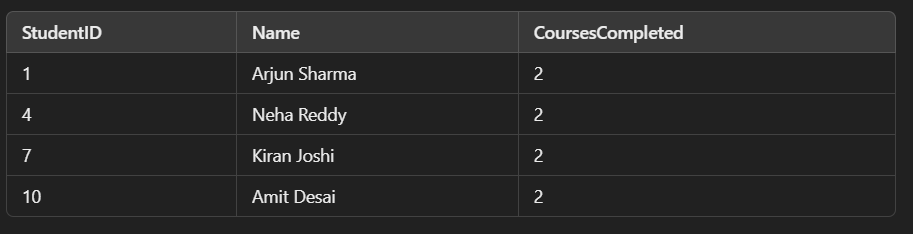






### Pandas

In [38]:
def course_enrollment(courses_df :pd.DataFrame , students_df : pd.DataFrame , enrollments_df :pd.DataFrame) -> pd.DataFrame:
  main_table = pd.merge(pd.merge(students_df , enrollments_df, on='StudentID', how ='left'),courses_df, on ='CourseID', how ='left' )
  group_table = main_table.groupby(['StudentID','Name']).agg(CoursesCompleted = ('CompletionStatus', lambda x : (x == 'Completed').sum())).reset_index()
  filter_data =  group_table.loc[group_table['CoursesCompleted'] >= 2]
  return filter_data

call_fun = course_enrollment(courses_df,students_df ,enrollments_df)
call_fun


,StudentID,Name,CoursesCompleted
0,1,Arjun Sharma,2
3,4,Neha Reddy,2
6,7,Kiran Joshi,2
9,10,Amit Desai,2
